# k-means

In [1]:
import numpy  as np
import pandas as pd

from matplotlib import pyplot as plt

plt.style.use('bmh')

In [2]:
def two_bivariate_normals( M1,S1,N1, M2,S2,N2 ):
    X1 = np.random.multivariate_normal(M1,S1,N1)
    X2 = np.random.multivariate_normal(M2,S2,N2)
    
    Y      = -np.ones(N1+N2)
    Y[N1:] = 1
    
    return np.concatenate( (X1,X2),axis=0 ).copy(), Y.copy()

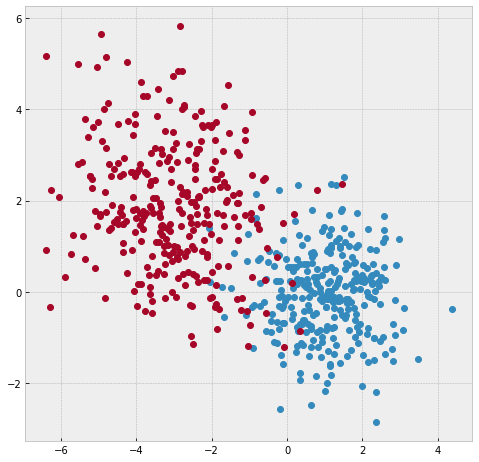

In [3]:
M_C1 = np.array([    1.0,  0.0 ])
S_C1 = np.array([ [  1.0,  0.0 ],
                  [  0.0,  1.0 ] ])
N_C1 = 300

M_C2 = np.array([   -3.0,  2.0 ])
S_C2 = np.array([ [  2.0, -0.5 ],
                  [ -0.5,  2.0 ] ])
N_C2 = 300


X,Y = two_bivariate_normals( M_C1,S_C1,N_C1, M_C2,S_C2,N_C2)

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1], 'o' )
plt.plot( X[Y== 1,0],X[Y== 1,1], 'o' )

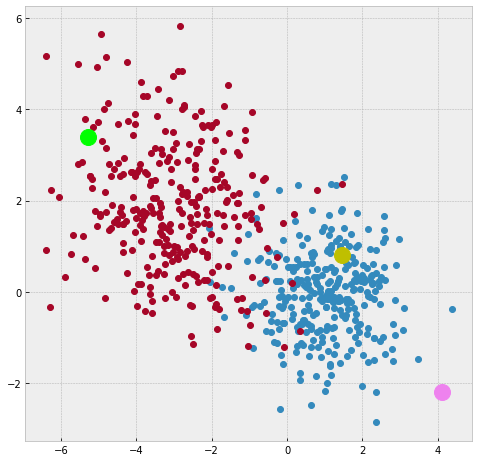

In [4]:
C = np.random.normal(0,2,2)

plt.figure(figsize=(8,8))
plt.plot( X[Y==-1,0],X[Y==-1,1], 'o' )
plt.plot( X[Y== 1,0],X[Y== 1,1], 'o' )
plt.plot( C[0]      ,C[1]      , 'o'           , 
                                 color='violet',
                                 markersize=16   )

plt.plot( X[0,0]    ,X[0,1]    , 'o'           , 
                                 color='y'     ,
                                 markersize=16   )
plt.plot( X[-1,0]   ,X[-1,1]   , 'o'           , 
                                 color='lime'  ,
                                 markersize=16   )

In [5]:
print( 'Distancia cuadrada de C a X_{:04d}: {:6.4f}' .format( 0          ,np.dot( C-X[ 0], C-X[ 0]) )  )
print( 'Distancia cuadrada de C a X_{:04d}: {:6.4f}' .format( N_C1+N_C2-1,np.dot( C-X[-1], C-X[-1]) )  )

Distancia cuadrada de C a X_0000: 16.0490
Distancia cuadrada de C a X_0599: 119.3156


In [6]:
k = 2
C = np.random.normal(0,5, X.shape[-1]*k).reshape( k,X.shape[-1] )
C

array([[ 0.02469856,  3.10743574],
       [-8.79799167,  4.47962165]])

In [91]:
def plot_classes(X,Y):
    plt.figure(figsize=(8,8))
    
    for i in np.unique(Y):
        plt.plot( X[Y==i,0],X[Y==i,1], 'o' )
        plt.plot( X[Y==i,0],X[Y==i,1], 'o' )

def plot_centroid_history(C_H):
    for ch in C_H:
        for c in ch:
            plt.plot( c[0],c[1], 'o'                 , 
                                  color     ='violet',
                                  markersize=16        )

In [8]:
D = []
for c in C:
    d = c[np.newaxis] - X
    d = np.diag(  np.dot( d,d.T )  )
    D.append(d)

D = np.array(D)

In [9]:
D.shape

(2, 600)

In [10]:
W = np.argmin(D,axis=0)
C

array([[ 0.02469856,  3.10743574],
       [-8.79799167,  4.47962165]])

In [11]:
for i in range(k):
    C[i] = X[W==i].mean(axis=0)

C

array([[-0.71356414,  0.78939202],
       [-5.23017326,  2.68695236]])

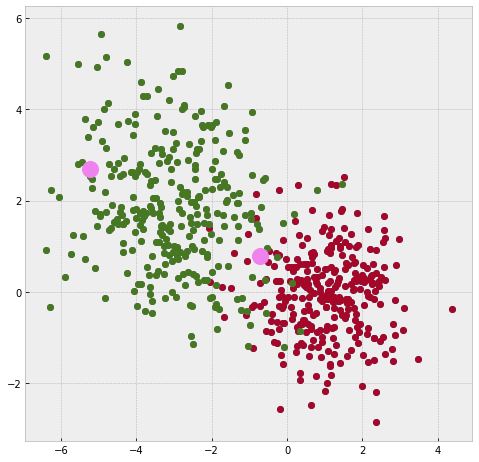

In [12]:
plot_classes(X,Y)
plot_centroid_history(C)

In [84]:
def d2_eucl(X,C):
    D = []
    for c in C:
        d = c[np.newaxis] - X
        d = np.diag(  np.dot( d,d.T )  )
        D.append(d)
    
    return np.array(D).copy()

k = 2
C = np.random.normal(0,5, X.shape[-1]*k).reshape( k,X.shape[-1] )

eps = 1

C_hist = []
C_hist.append(C)
while(eps>.01):
    C_new  = []
    W      = np.argmin( d2_eucl(X,C),axis=0 )
    for i in np.unique(W):
        C_new.append( X[W==i].mean(axis=0) )

    C_new = np.array(C_new)
    try:
        eps   = C_hist[-1]-C_new
        eps   = np.abs(eps).sum()
        C_hist.append(C_new)
        C     = C_new
    except:
        pass
    
    print(eps)

12.905350439882067
3.251236544753169
1.2154423480668015
0.22461765069480255
0.06176348335476751
0.0


In [93]:
len(C_hist)

7

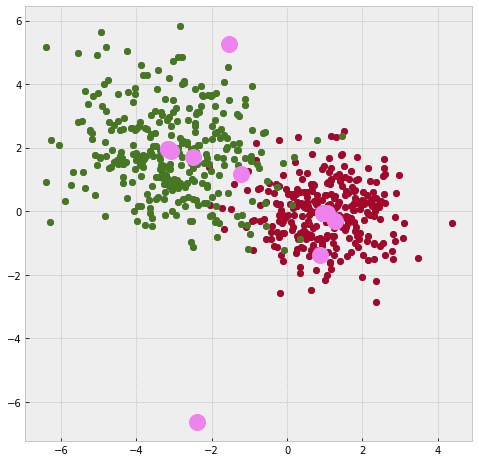

In [92]:
plot_classes(X,Y)
plot_centroid_history(C_hist)

In [13]:
k = 2
C = np.random.normal(0,5, X.shape[-1]*k).reshape( k,X.shape[-1] )

eps = 1

C_History = [ C.copy() ]
while(eps>0.1):
    D = []
    for c in C_History[-1]:
        d = c[np.newaxis] - X
        d = np.diag(  np.dot( d,d.T )  )
        D.append(d)
    
    D = np.array(D)
    W = np.argmin(D,axis=0)
    C = [X[W==i].mean(axis=0) for i in np.unique(W)]
    print(np.array(C).shape)
    C_History.append( np.array(C) )
    
    eps = np.abs( C_History[-1] - C_History[-2] ).sum()

(1, 2)
(1, 2)


In [15]:
print( np.array(C_History) )

[array([[ -1.20690842, -11.8208934 ],
       [ -2.58294192,   2.03292979]])
 array([[-1.01467142,  0.91589604]]) array([[-1.01467142,  0.91589604]])]


IndexError: index 1 is out of bounds for axis 0 with size 1

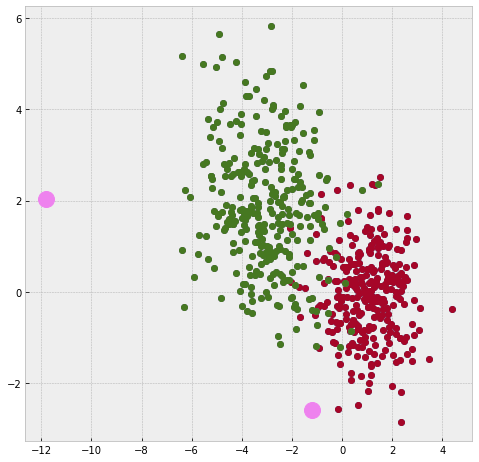

In [16]:
plot_classes(X,Y)
plot_centroid_history( C_History )

In [147]:
np.array(C_History)

array([[[ 1.86106446,  4.69701358],
        [-0.16907253,  4.01740981],
        [-3.77313697, -3.47156773],
        [ 5.89163174,  6.86095336]],

       [[ 6.54504904,  5.14885747],
        [-2.86268817,  6.92202584],
        [-7.84133413, -4.82837588],
        [ 5.89163174,  6.86095336]],

       [[ 6.54504904,  5.14885747],
        [-2.86268817,  6.92202584],
        [-7.84133413, -4.82837588],
        [ 5.89163174,  6.86095336]]])